In [4]:
from qiskit import *
import qiskit
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
%matplotlib inline

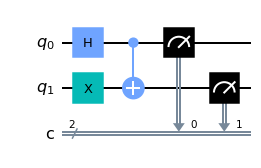

In [5]:
# initialize the quantum circuit with two quibits and two classical bits
circuit = QuantumCircuit(2,2)
# applies the hadamard gate to the quibit 0
circuit.h(0)

circuit.x(1)
circuit.cx(0,1)
# Adds the measurement to the circuit
# and quibit 0 and 1 are to be measured and to be stored in classical bit 0 and 1
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')


{'000000101': 1}
{'000000101': 1}
{"000000101": 1}

{"000000101": 1}
"000000101": 1}
000000101


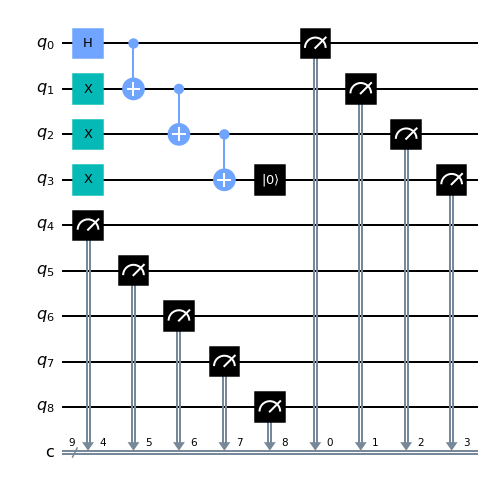

In [6]:
import json
circuit = qiskit.QuantumCircuit(9,9)
simulator = qiskit.Aer.get_backend('qasm_simulator')
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)
circuit.x(2)
circuit.cx(1,2)
circuit.x(3)
circuit.cx(2,3)
circuit.reset(3)
circuit.measure([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
job = qiskit.execute(circuit, simulator, shots=1)
print(job.result().get_counts(circuit))
# Grab results from the job
result = job.result()
print(result.get_counts())

out = json.dumps(result.get_counts()) #Converts the result.get_counts() into a string
print(out)
print()
print(out[:])
print(out[1:])

string = out[2:11] #Removes unnecessary data from string, leaving us with board
print(string)
circuit.draw(output='mpl') 



In [7]:
import pygame

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 300, 300
LINE_COLOR = (255, 255, 255)
LINE_WIDTH = 5
GRID_SIZE = 3

# Set up the display window
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("3x3 Grid")

def draw_grid():
    # Draw vertical lines
    for i in range(1, GRID_SIZE):
        pygame.draw.line(screen, LINE_COLOR, (i * WIDTH // GRID_SIZE, 0), (i * WIDTH // GRID_SIZE, HEIGHT), LINE_WIDTH)
    
    # Draw horizontal lines
    for i in range(1, GRID_SIZE):
        pygame.draw.line(screen, LINE_COLOR, (0, i * HEIGHT // GRID_SIZE), (WIDTH, i * HEIGHT // GRID_SIZE), LINE_WIDTH)

def board_coordinates():
    return [[0,0,0] for i in range(3)]


def quanutum_game(board_coordinate, circuit, turn, recent_moves):
    first_move = recent_moves[0]
    second_move = recent_moves[1]

    # hamard gate
    circuit.h(first_move[0]*3 + first_move[1])

    # x gate
    circuit.x(second_move[0]*3 + second_move[1])

    # control not gate
    circuit.cx(first_move[0]*3 + first_move[1], second_move[0]*3 + second_move[1])

    print(circuit.draw())

    # initialize the hadamard gate hehahah
    # circuit.h()
    # ...



    





def draw_x_or_y(board_coordinates):
    font = pygame.font.Font('freesansbold.ttf', 60)
    for row in range(3):
        for col in range(3):
            if board_coordinates[row][col] == 1:
                
                # Here True is written to enable smooth edges
                text = font.render("X", True, (255, 0, 0))
                text_rect = text.get_rect(center=(col * WIDTH // GRID_SIZE + WIDTH // GRID_SIZE // 2, row * HEIGHT // GRID_SIZE + HEIGHT // GRID_SIZE // 2))
                screen.blit(text, text_rect)
            elif board_coordinates[row][col] == -1:
                text = font.render("O", True, (0, 0, 255))
                text_rect = text.get_rect(center=(col * WIDTH // GRID_SIZE + WIDTH // GRID_SIZE // 2, row * HEIGHT // GRID_SIZE + HEIGHT // GRID_SIZE // 2))
                screen.blit(text, text_rect)






board_coordinates = board_coordinates()

circuit = qiskit.QuantumCircuit(9,9)

recent_moves = []

# Main loop
running = True
x_turn = True
count = 0
while running:
    for event in pygame.event.get():

        
        if event.type == pygame.QUIT:
            running = False

        if event.type == pygame.MOUSEBUTTONDOWN:
            mouse_x, mouse_y = pygame.mouse.get_pos()
            cols = mouse_x // (WIDTH // GRID_SIZE)
            rows = mouse_y // (HEIGHT // GRID_SIZE)
            recent_moves.append([rows, cols])
            
            if len(recent_moves) > 2:
                recent_moves.pop(0)
                recent_moves.pop(1)


            if 0 <= rows < GRID_SIZE and 0 <= cols < GRID_SIZE:
            #     if x_turn:
            #         board_coordinates[rows][cols] = 1
            #         x_turn = False
            #     else:
            #         board_coordinates[rows][cols] = -1
            #         x_turn = True

                        # if 0 <= rows < GRID_SIZE and 0 <= cols < GRID_SIZE:
                if x_turn:
                    
                    
                    board_coordinates[rows][cols] = 1
                    
                    count += 1
                    if count == 2:
                        
                        x_turn = False
                        count = 0
                    

                else:
                    board_coordinates[rows][cols] = -1
                    count += 1
                    if count == 2:
                        
                        x_turn = True
                        count = 0

                        
    
    
    # Clear the screen
    screen.fill((0, 0, 0))
    draw_grid()
    if len(recent_moves) == 2:
        quanutum_game(board_coordinates, circuit, x_turn, recent_moves)
    
    # quanutum_game(board_coordinates, circuit, x_turn)
    

    draw_x_or_y(board_coordinates)
    # print(board_coordinates)

    # Update the display
    pygame.display.flip()

# Quit Pygame
pygame.quit()


pygame 2.5.0 (SDL 2.28.0, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
q_2: ──────────
               
q_3: ──────────
               
q_4: ──────────
               
q_5: ──────────
               
q_6: ──────────
               
q_7: ──────────
               
q_8: ──────────
               
c: 9/══════════
               
     ┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ H ├──■──
     ├───┤┌─┴─┐├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘
q_2: ────────────────────
                         
q_3: ────────────────────
                         
q_4: ────────────────────
                         
q_5: ────────────────────
                         
q_6: ────────────────────
                         
q_7: ────────────────────
                         
q_8: ────────────────────
                         
c: 9/════════════════════
                         
     ┌